# MIDTERM CS370

## PROBLEM SET 1: BAYESIAN LEARNING AND INFERENCE (TAKE HOME PROBLEM)

### PS1.1: Learning the bent coin experiment (15 points)

Consider a bent coin that has a probability of 0.7 of landing heads and a probability of 0.3 of landing tails. The coin is flipped m times. The sequence of heads and tails is recorded / observed and a hypothetical receiver needs to estimate the probability of heads from the experimental data.


####  PS1.1-1 (2.5 points)

What is the entropy in bits of the bent coin? Explain why its < 1 bits.



<div class="alert-info">
<h5 align="left"> <font color='black'>PS1.1-1 SOLUTION</font></h5>
</div>

<br> $Entropy = \Sigma p(x) \log_2(p(x))$
<br> $Entropy = - [0.7 \log_2(0.7) + 0.4 \log_2(0.3)]$
<br> $Entropy = - [-0.36 - 0.52]$
<br> $Entropy = 0.88$

The entropy of a fair coin (one that has equal probability of heads and tails of 0.5 each) is 1 bit. This represents the maximum uncertainty or randomness because there's no bias towards either outcome.

In contrast, the bent coin has a bias towards heads with a probability of 0.7. This means that there's less uncertainty compared to a fair coin because there's a higher likelihood of getting heads. As a result, the entropy of the bent coin is less than 1 bit, indicating lower uncertainty or randomness in the outcomes compared to a fair coin.

#### PS1.1-2 (2.5 points)

Plot the entropy of the sequence of heads and tails as m increases for m=1 to m=500 in steps of 50?

<div class="alert-info">
<h5 align="left"> <font color='black'>PS1.1-2 SOLUTION</font></h5>
</div>

<br> Since this is a binary choice between heads and tails, we will use log base 2 for the calculation of entropy.
<br>
<br> $Entropy = \Sigma p(x) \log_2(p(x))$
<br>
<br> - $\Sigma$ The sigma denotes the sum because we are summing the products of each outcome's probability and tje logarithm of that probability.
<br> - $p(x)$ is the probability of the outcome $x$ occuing. In this case, $x$ can be either heads or tails.
<br> - $\log_2(p(x)$ is the base-2 logarithm of the probability of outcome $x$. The base-2 logarithm is used because there are two possible outcomes in a binary choice.

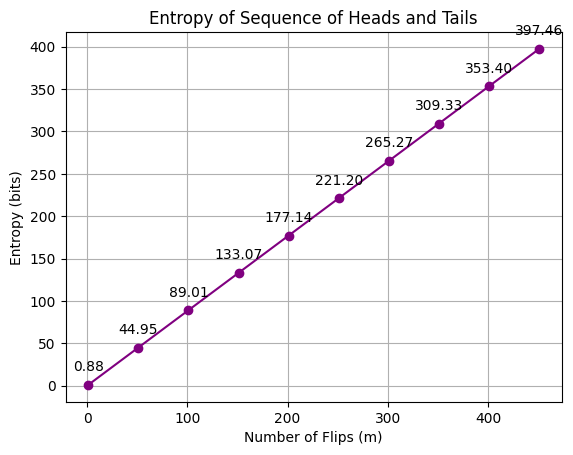

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = 0.7 # probability of heads

def calculate_entropy(px, m):
    return - (px * np.log2(px) * m + (1 - px) * np.log2(1 - px) * m)

# Calculate entropy for each value of m
m_values = np.arange(1, 501, 50)
entropy_values = []
for m in m_values:
    p_heads_observed = np.random.binomial(m, p_heads) / m
    entropy = calculate_entropy(p_heads, m)
    entropy_values.append(entropy)

# Plotting
plt.plot(m_values, entropy_values, marker='o', color='purple')
for i, txt in enumerate(entropy_values):
    plt.annotate('{:.2f}'.format(txt), (m_values[i], entropy_values[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Entropy of Sequence of Heads and Tails')
plt.xlabel('Number of Flips (m)') ; plt.ylabel('Entropy (bits)')
plt.grid(True); plt.show()


The graph shows that even though the individual probabilities of heads and tails remain constant as P(heads)=0.7 and P(tails)=0.3, the overall uncertainty (entropy) of the sequence increases with more flips.

#### PS1.1-3 (10 points)

The receiver is given the sequence of heads and tails and must use the Bayes rule to estimate the probability of heads. As a parenthesis, if we know this parameter then we we can infer / predict the next binary event but this is not the focus here.

The prior probability distribution is assumed to be beta and to solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.5) titled "Bayesian Parameter Learning". You are asked to estimate and plot the **mean of the posterior probability distribution** of the probability of heads as a function of the probability of heads given the sequence of heads and tails where m=[0,1, 2, 3, 4, 5, 10, 20, 50, 100].

You can use the scipy.stats library to help you out. To get full points you need to document extensively your code and explain the results. Note that you have to produce except from the 10 plots, a table with the mean and variance where the columns will be $m$, mean, var.



<div class="alert-info">
<h5 align="left"> <font color='black'>PS1.1-3 SOLUTION</font></h5>
</div>

Bayes' Theorem:
<br>
<br> $P(A|B) = \frac{P(A)P(B|A)}{P(B)}$
<br>
<br> where:
<br>
<br> $P(A|B)$ is the posterior
<br> $P(A)$ is the prior
<br> $P(B|A)$ is the likelihood
<br>
<br> In the continuous case, the denominator $P(B)$ in Bayes' theorem becomes an integral over all possible values of $B$. This integral is often complex and computationally intensive. Therefore, we will be working with proportions between the prior, likelihood, and posterior distribution. Mathematically, it is expressed as:
<br>
<br> $Posterior(\theta | D) \propto L(\theta; D) \times Prior(\theta)$
<br>
<br> __Likelihood__
<br> We assume the data $D$ follows a binomial distribution with parameters $m$ (number of trials) and $k$ (number of successes). The likelihood function of observing $k$ successes out of $n$ trial is
<br>
<br> $L(\theta; D) = \binom{n}{k} \theta^k (1-\theta)^{n-k}$
<br>
<br> __Prior__
<br> We assume a prior belief about the parameter $\theta$ modeled by a beta distribution with parameters $\alpha$ and $\beta$. The pdf of $\theta$ is:
<br>
<br> $Prior(\theta) = \frac{\theta^{\alpha-1} \times (1-\theta)^{\beta-1}}{B(\alpha,\beta)}$
<br>
<br>__Posterior Distribution__
<br> Altogether, we have:
<br> $Posterior(\theta | D) \propto L(\theta; D) \times Prior(\theta)$
<br> $Posterior(\theta | D) \propto \binom{n}{k} \theta^k (1-\theta)^{n-k} \times \frac{\theta^{\alpha-1} \times (1-\theta)^{\beta-1}}{B(\alpha,\beta)}$
<br> $Posterior(\theta | D) \propto \theta^{k+\alpha-1}(1-\theta)^{n-k+\beta-1}$
<br>
<br> This resembles the form of a beta distribution with parameters $k + \alpha - 1$ and $n - k + \beta - 1$
<br>
<br> __Normalization__
<br> To ensure the posterior distribution is a proper probability distribution, we need to normalize it by diving the beta function:
<br>
<br> $Posterior(\theta | D) = \frac{\theta^{k+\alpha-1}(1-\theta)^{n-k+\beta-1}} {k + \alpha, n - k + \beta}$

<br>

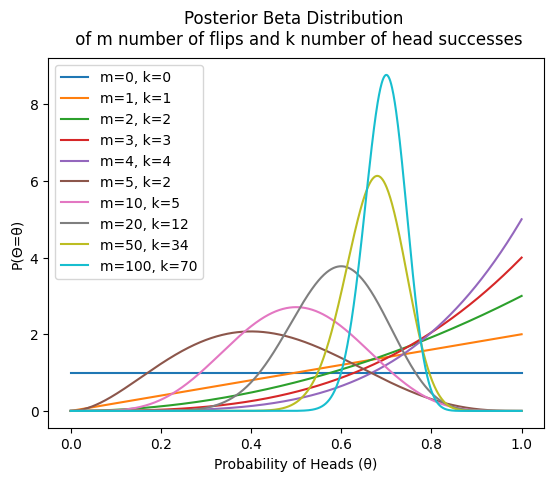

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def likelihood(theta: float, k: int, m: int):
    """
    Calculate the likelihood of observing k heads in m flips given theta.

    Parameters:
        theta: Probability of heads.
        k: Number of heads observed.
        m: Total number of coin flips.
           (this is the n trial in the likelihood function above)
    Returns:
        float: P(D|theta) Likelihood of observing k heads in m flips given theta.
    """
    return (theta ** k) * ((1 - theta) ** (m - k))

# Theta is the probability of heads
theta = 0.7
m_values = [0, 1, 2, 3, 4, 5, 10, 20, 50, 100]

# Prior parameters
a_prior = 1
b_prior = 1

mean_posterior = []
# Calculate likelihood and posterior for each value of m
for m in m_values:
    # (1) UPDATING PRIOR TO POSTERIOR
    """
        For each value of m the code generates a random number of heads observed, k.
        Then, it calculates the likelihood of observing k heads in m flips given
        theta. Finally, it updates the prior parameters (which was 1 at the start)
        to obtain the posterior parameter.

    """
    #--- Generate a random number of heads "observed"
    k_heads_success = np.random.binomial(m, theta)

    #--- Calculate likelihood
    likelihood_value = likelihood(theta, k_heads_success, m)

    #--- Updte the prior parameters to posterior parameters
    a_posterior = a_prior + k_heads_success
    b_posterior = b_prior + (m - k_heads_success)

    # (2) CALCULATE THE MEAN OF THE POSTERIOR DISTRIBUTION
    """
        The mean of the posterior distribution is calculated for each value of m.
        This is done by dividing the sum of the posterior parameters by their total.
        This mean represents the updated belief about the probability of heads
        after observing the data.

    """
    mean = a_posterior / (a_posterior + b_posterior)
    mean_posterior.append(mean)

    # (3) PLOT THE POSTERIOR DISTRIBUTION
    """
        np.linspace(0, 1, 1000): generates 1000 evenly spaced values between 0 and 1.
        These x values represent possible values of the probability of heads (θ).
        beta.pdf() computes the pdf of the beta distribution

    """
    x = np.linspace(0, 1, 1000)
    posterior_pdf = beta.pdf(x, a_posterior, b_posterior)
    plt.plot(x, posterior_pdf, label=f"m={m}, k={k_heads_success}")

plt.title("Posterior Beta Distribution \n of m number of flips and k number of head successes", pad=10)
plt.xlabel("Probability of Heads (θ)")
plt.ylabel("P(Θ=θ)")
plt.legend()
plt.show()


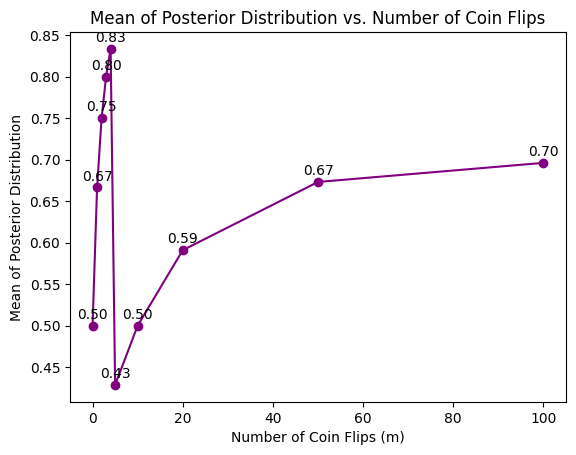

In [3]:
# (4) PLOT THE MEAN OF THE POSTERIOR DISTRIBUTION AS A FUNCTION OF THE NUMBER OF COIN FLIPS
plt.plot(m_values, mean_posterior, marker='o', color='purple')
for i, txt in enumerate(mean_posterior):
    plt.annotate('{:.2f}'.format(txt), (m_values[i], mean_posterior[i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.title("Mean of Posterior Distribution vs. Number of Coin Flips")
plt.xlabel("Number of Coin Flips (m)")
plt.ylabel("Mean of Posterior Distribution")
plt.show()

### PS1.2 Bayesian Linear Regression (15 points)

#### PS1.2-1 Dataset (2.5 points)

Generate a dataset of $m$ data points identical to the example of Figure 4.1 in GERON but modify the code such that you can produce results for the very small (eg 3 data points), low $m$ (eg 10 data points) and larger $m$ (eg 100 data points) cases.

In [4]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

<div class="alert-info">
<h5 align="left"> <font color='black'>PS1.2-1 SOLUTION</font></h5>
</div>

In [5]:
def generate_dataset(m):
    np.random.seed(42)
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.randn(m, 1)
    return X, y

# Generate datasets for different values of m
m_small = 3
m_low = 10
m_large = 100

X_small, y_small = generate_dataset(m_small)
X_low, y_low = generate_dataset(m_low)
X_large, y_large = generate_dataset(m_large)

#### PS1.2-2 Bayesian  Regression  (12.5 points)

To solve this problem, you need to review the similar example presented in your AIMA textbook (Section 20.2.6) titled "Bayesian Linear Regression". You can also look at the code [here](https://github.com/pantelis-classes/PRML/blob/master/prml/linear/_bayesian_regression.py).

Replicate the the Figure 20.7 (a) and (b) shown below. You dont have to replicate the exact examples but you have to generate two figures. The first should show the predictive distribution for the case of small data (sparsity) eg $m=3$ and the second when we have more data eg $m=10$.  Confidence intervals should be shown using the exaxt same standard deviations (1-3 $\sigma$) as in the figure.

![](Fig_20_07.png)

Significant number of points will be subtracted if the code presented is not well documented and if the results are not explained. Use markdown cell and markdown to write a tutorial like treatment of the problem even if this entails copying the equations from the book.

<div class="alert-info">
<h5 align="left"> <font color='black'>PS1.2-2 SOLUTION</font></h5>
</div>


Dataset size: 3
Estimated Slope: 0.4426659169755573
Estimated Intercept: -0.823091620267193
Estimated Sigma: 0.7715408735404576


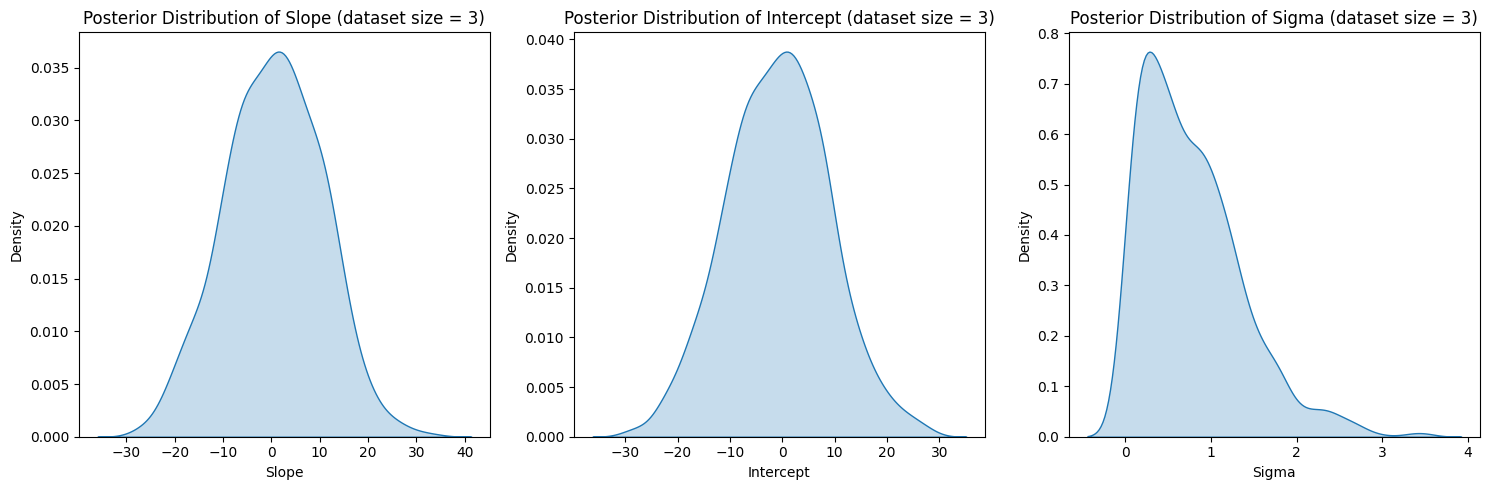


Dataset size: 10
Estimated Slope: 0.5093584390930709
Estimated Intercept: -0.07835278722735625
Estimated Sigma: 0.7802714995772005


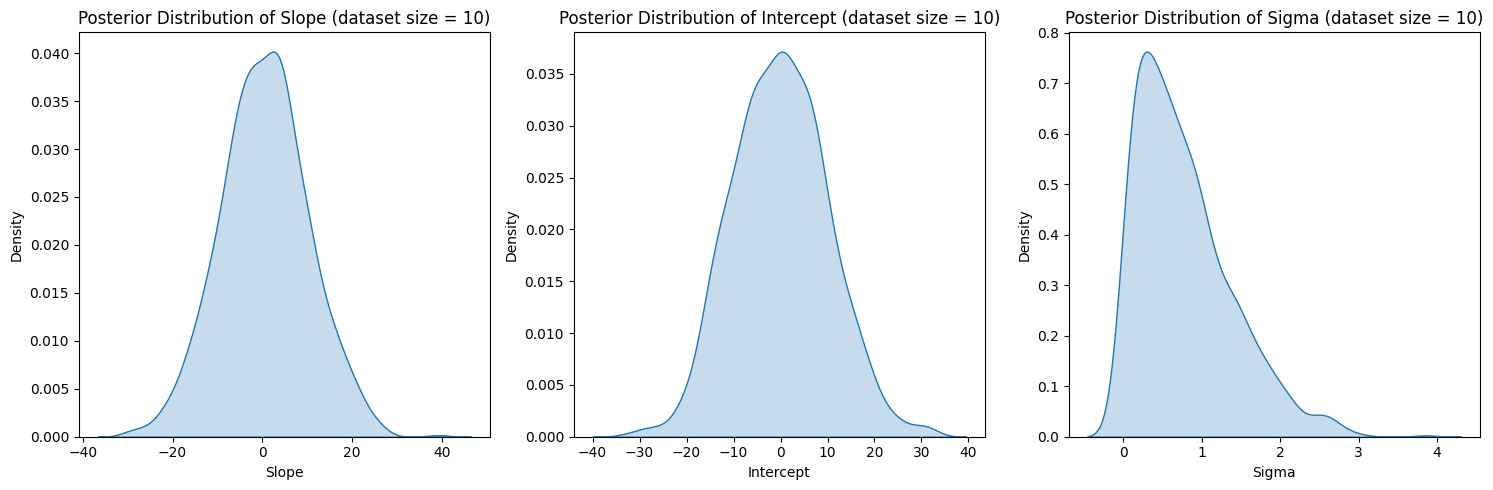


Dataset size: 100
Estimated Slope: 0.4609897006016653
Estimated Intercept: 0.4410719952348189
Estimated Sigma: 0.8050228720960142


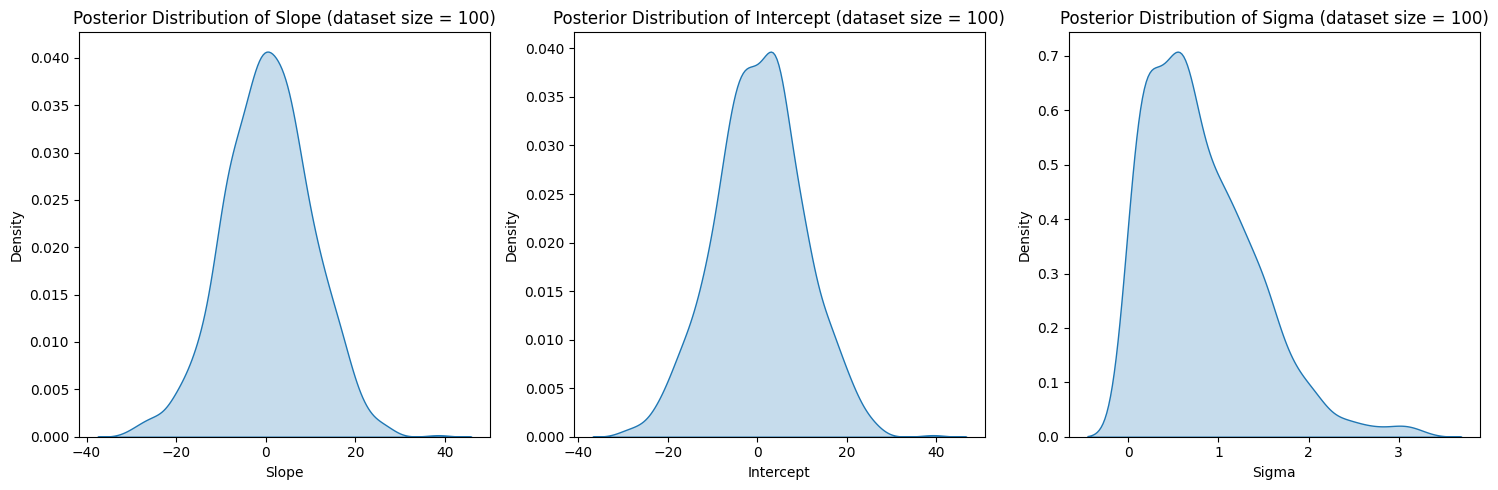

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def generate_dataset(m):
    np.random.seed(42)
    X = 2 * np.random.rand(m, 1)
    TRUE_C = 4  # intercept
    TRUE_M = 3  # slope
    y = TRUE_M * X + TRUE_C + np.random.randn(m, 1)
    return X, y

# Define the Bayesian regression model
def model(X, Y):
    # Priors for the parameters
    slope = np.random.normal(0, 10)
    intercept = np.random.normal(0, 10)
    sigma = stats.halfnorm.rvs(scale=1)

    # Expected value of the outcome
    mu = intercept + slope * X

    # Likelihood (sampling distribution) of the observations
    likelihood = stats.norm(mu, sigma).pdf(Y).prod()

    return slope, intercept, sigma, likelihood

# Run Bayesian inference by sampling from the posterior
def inference(X, Y, num_samples):
    posterior_samples = []
    for _ in range(num_samples):
        samples = model(X, Y)
        posterior_samples.append(samples)
    return np.array(posterior_samples)

# Generate datasets for different values of m
m_small = 3
m_low = 10
m_large = 100

datasets = [(X_small, m_small), (X_low, m_low), (X_large, m_large)]

# Perform Bayesian regression analysis for each dataset
for X, m in datasets:
    # Run inference
    num_samples = 1000
    posterior = inference(X.flatten(), generate_dataset(m)[1].flatten(), num_samples)

    # Extract parameter samples
    slope_samples = posterior[:, 0]
    intercept_samples = posterior[:, 1]
    sigma_samples = posterior[:, 2]

    # Compute posterior means
    slope_mean = np.mean(slope_samples)
    intercept_mean = np.mean(intercept_samples)
    sigma_mean = np.mean(sigma_samples)

    # Print the estimated parameters
    print('\033[92m') # blue font
    print(f"Dataset size: {m}")
    print("Estimated Slope:", slope_mean)
    print("Estimated Intercept:", intercept_mean)
    print("Estimated Sigma:", sigma_mean)

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the posterior distribution of the slope
    sns.kdeplot(slope_samples, fill=True, ax=axs[0])
    axs[0].set_title(f"Posterior Distribution of Slope (dataset size = {m})")
    axs[0].set_xlabel("Slope")
    axs[0].set_ylabel("Density")

    # Plot the posterior distribution of the intercept
    sns.kdeplot(intercept_samples, fill=True, ax=axs[1])
    axs[1].set_title(f"Posterior Distribution of Intercept (dataset size = {m})")
    axs[1].set_xlabel("Intercept")
    axs[1].set_ylabel("Density")

    # Plot the posterior distribution of sigma
    sns.kdeplot(sigma_samples, fill=True, ax=axs[2])
    axs[2].set_title(f"Posterior Distribution of Sigma (dataset size = {m})")
    axs[2].set_xlabel("Sigma")
    axs[2].set_ylabel("Density")

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()


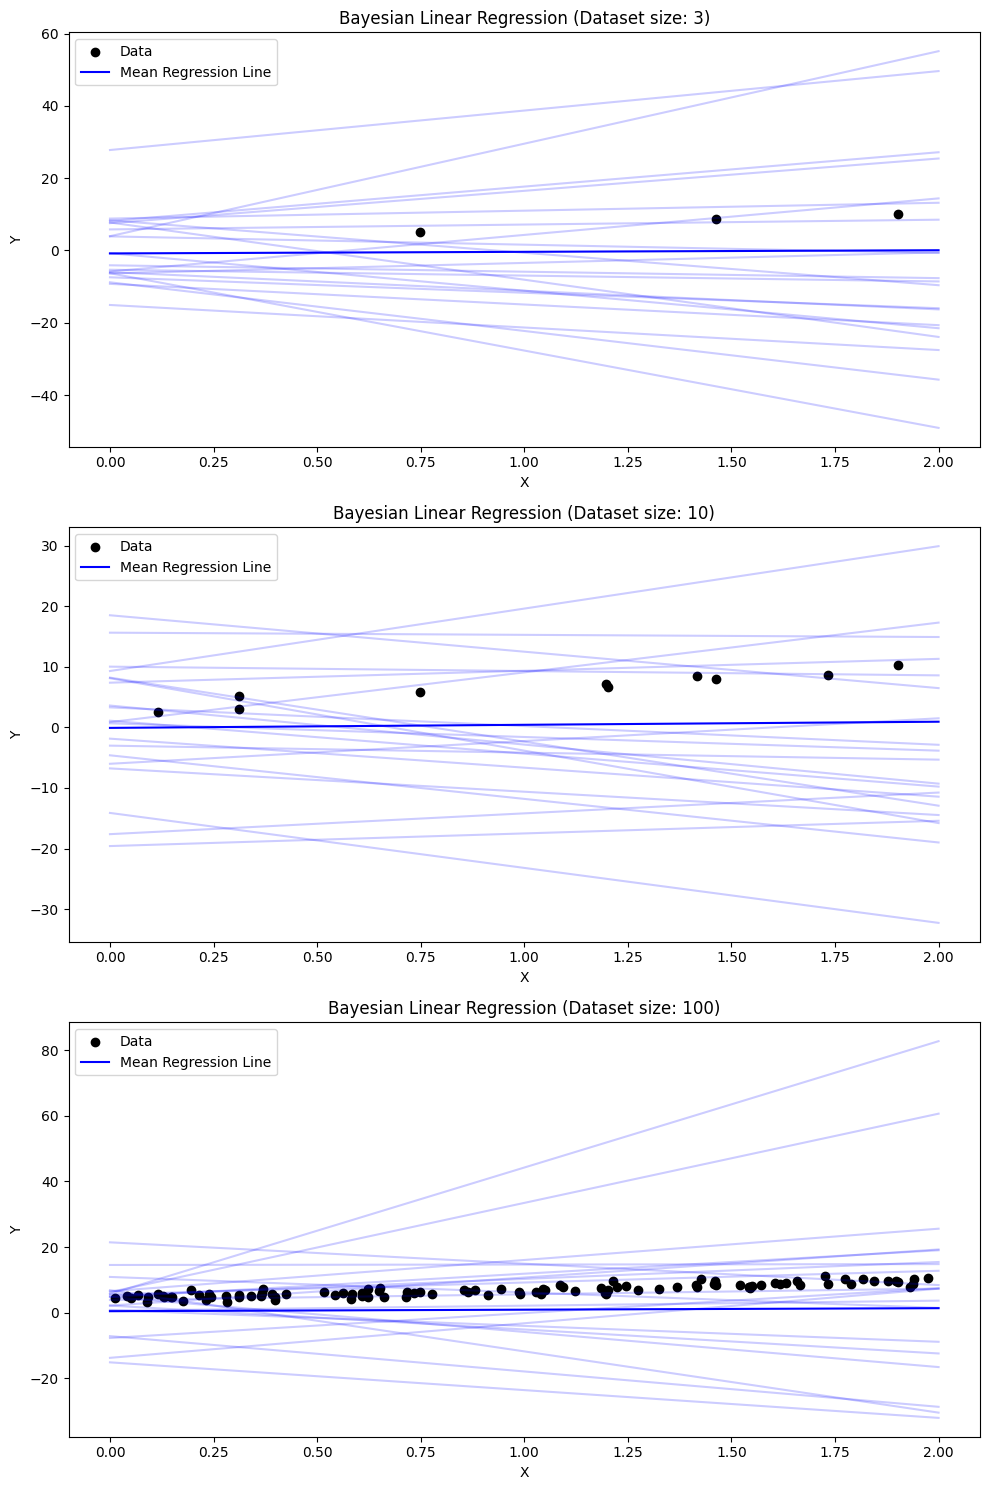

In [7]:
datasets = [(X_small, m_small), (X_low, m_low), (X_large, m_large)]

# Perform Bayesian regression analysis for each dataset
fig, axs = plt.subplots(3, figsize=(10, 15))
for i, (X, m) in enumerate(datasets):
    # Run inference
    num_samples = 1000
    posterior = inference(X.flatten(), generate_dataset(m)[1].flatten(), num_samples)

    # Extract parameter samples
    slope_samples = posterior[:, 0]
    intercept_samples = posterior[:, 1]

    # Compute posterior means
    slope_mean = np.mean(slope_samples)
    intercept_mean = np.mean(intercept_samples)

    # Generate regression lines using posterior samples
    num_lines = 20
    X_pred = np.linspace(0, 2, 100)
    Y_preds = np.empty((num_lines, len(X_pred)))
    for j in range(num_lines):
        Y_preds[j] = intercept_samples[j] + slope_samples[j] * X_pred

    # Plot Bayesian linear regression
    axs[i].scatter(X, generate_dataset(m)[1], label='Data', color='black')
    for j in range(num_lines):
        axs[i].plot(X_pred, Y_preds[j], color='blue', alpha=0.2)
    mean_Y_pred = intercept_mean + slope_mean * X_pred
    axs[i].plot(X_pred, mean_Y_pred, color='blue', label='Mean Regression Line')
    axs[i].set_title(f"Bayesian Linear Regression (Dataset size: {m})")
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Y")
    axs[i].legend()

plt.tight_layout()
plt.show()